# Demonstrations of the mngs.dsp Module
mngs.dsp module is designed to simplify the process of digital signal processing in Python. Implemented functions are capable of handling both NumPy and PyTorch arrays, with straightforward integration of GPU calculations.

In [1]:
!pip uninstall mngs -y
!pip install -U git+https://github.com/ywatanabe1989/mngs.git@develop

Found existing installation: mngs 1.1.1
Uninstalling mngs-1.1.1:
  Successfully uninstalled mngs-1.1.1
  Cloning https://github.com/ywatanabe1989/mngs.git (to revision develop) to /tmp/pip-req-build-tz9hs26k
  Running command git clone --filter=blob:none --quiet https://github.com/ywatanabe1989/mngs.git /tmp/pip-req-build-tz9hs26k
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/ywatanabe1989/mngs.git to commit 17c5893c50f038a30465bc42b7d9eda5aee74e02
  Preparing metadata (setup.py) ... done
  Created wheel for mngs: filename=mngs-1.1.1-py3-none-any.whl size=202403 sha256=0e64a76887e4e8697f0ccebaa0b2a982cc33563c6ef2ef1f4237427c98952a1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-u56zs8rr/wheels/49/4c/15/fc1d6d08297c40d7b2da5e5161b7d8f14cb99bfb8a897ad685
Successfully built mngs


In [2]:
import mngs
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt, CC = mngs.plt.configure_mpl(plt, fig_scale=5)


----------------------------------------
Matplotlib has been configured as follows:

Figure DPI (Display): 100 DPI
Figure DPI (Save): 300 DPI
Figure Size (Not the Axis Size): 800.0 x 500.0 mm (width x height)
Font Size (Title): 8 pt
Font Size (X/Y Label): 8 pt
Font Size (Tick Label): 7 pt
Font Size (Legend): 6 pt
Hide Top and Right Axes: True
Custom Colors (RGBA):
  blue: (0, 128, 192, 0.75)
  red: (255, 70, 50, 0.75)
  pink: (255, 150, 200, 0.75)
  green: (20, 180, 20, 0.75)
  yellow: (230, 160, 20, 0.75)
  grey: (128, 128, 128, 0.75)
  purple: (200, 50, 255, 0.75)
  lightblue: (20, 200, 200, 0.75)
  brown: (128, 0, 0, 0.75)
  darkblue: (0, 0, 100, 0.75)
  orange: (228, 94, 50, 0.75)
  white: (255, 255, 255, 0.75)
  black: (0, 0, 0, 0.75)
----------------------------------------


In [3]:
# Demo Signal
xx, tt, fs = mngs.dsp.demo_sig() # numpy array, but it will automatically computed in pytorch with cuda enabled if designated
# xx = torch.tensor(xx)
# xx = torch.tensor(xx).cuda()
# xx = pd.DataFrame(xx)

# Resampling
TGT_FS = 128
resampled = mngs.dsp.filt.resample(xx, fs, TGT_FS, cuda=True)

# Filtering
filted_bp= mngs.dsp.filt.bandpass(xx, fs, low_hz=10, high_hz=50, cuda=True)
filted_bs = mngs.dsp.filt.bandstop(xx, fs, low_hz=10, high_hz=50, cuda=True)
filted_gauss = mngs.dsp.filt.gauss(xx, sigma=3, cuda=True)

# Power Spetrum Density
pp, ff = mngs.dsp.psd(xx, fs, cuda=True)

# Wavelet Transformation
ww, ff = mngs.dsp.wavelet(xx, fs, cuda=True)

# Hilbert Transformation
y = mngs.dsp.hilbert(xx, cuda=True)
pha, amp = y[..., 0], y[..., 1]

/usr/local/lib/python3.10/dist-packages/mngs/general/_converters.py:78: UserWarning: Converted from  <class 'numpy.ndarray'> to torch.Tensor (cuda)
  warnings.warn(


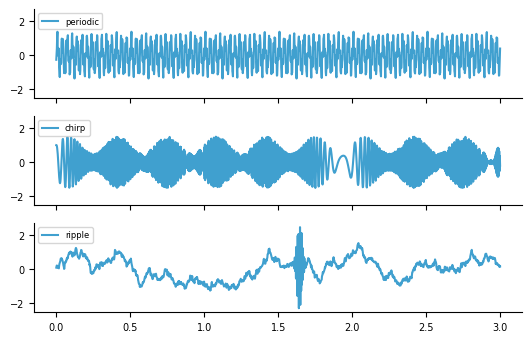

In [7]:
# Plots
TYPES = ["periodic", "chirp", "ripple"]
FREQS_HZ = [30, 100, 300]
xs = {type: mngs.dsp.demo_sig(freqs_hz=FREQS_HZ, type=type)[0] for type in TYPES}

# Plots
fig, axes = plt.subplots(nrows=len(xs), sharex=True, sharey=True)
for ((k,x), ax) in zip(xs.items(), axes):
  ax.plot(tt, x[0,0], label=k)
  ax.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.10/dist-packages/mngs/general/_converters.py:78: UserWarning: Converted from  <class 'numpy.ndarray'> to torch.Tensor (cpu)
  warnings.warn(


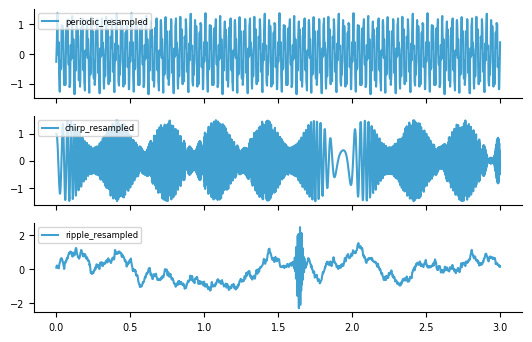

In [9]:
# Resample
TGT_FS = 512

resampled = {}
for k, x in xs.items():
  resampled[f"{k}_resampled"] = mngs.dsp.filt.resample(x, fs, TGT_FS)

# Plots
fig, axes = plt.subplots(nrows=len(resampled), sharex=True)
for (k,x), ax in zip(resampled.items(), axes):
  ax.plot(tt, x[0,0], label=k)
  ax.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.10/dist-packages/mngs/general/_converters.py:78: UserWarning: Converted from  <class 'numpy.ndarray'> to torch.Tensor (cpu)
  warnings.warn(


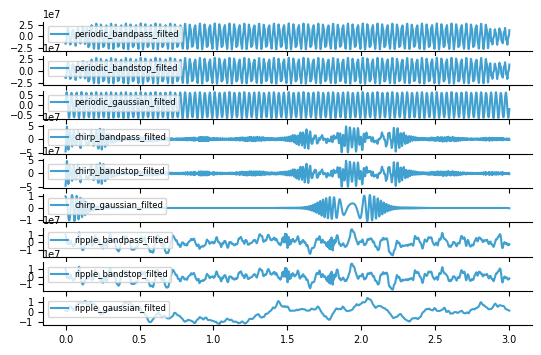

In [10]:
# Filtering
filted = {}
for k, x in xs.items():
  filted[f"{k}_bandpass_filted"] = mngs.dsp.filt.bandpass(x, fs, low_hz=10, high_hz=50)
  filted[f"{k}_bandstop_filted"] = mngs.dsp.filt.bandstop(x, fs, low_hz=10, high_hz=50)
  filted[f"{k}_gaussian_filted"] = mngs.dsp.filt.gauss(x, sigma=3)

# Plots
fig, axes = plt.subplots(nrows=len(filted), sharex=True)
for (k,x), ax in zip(filted.items(), axes):
  ax.plot(tt, x[0,0], label=k)
  ax.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.10/dist-packages/mngs/general/_converters.py:78: UserWarning: Converted from  <class 'numpy.ndarray'> to torch.Tensor (cuda)
  warnings.warn(


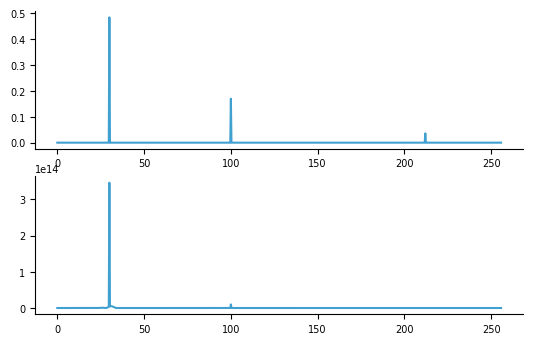

In [11]:
# PSD
fig, axes = plt.subplots(nrows=2)
signals = [xs['periodic'], filted['periodic_bandpass_filted']]
for xx, ax in zip(signals, axes):
  pp, ff = mngs.dsp.psd(xx, fs, cuda=True)
  ax.plot(ff, pp[0,0])

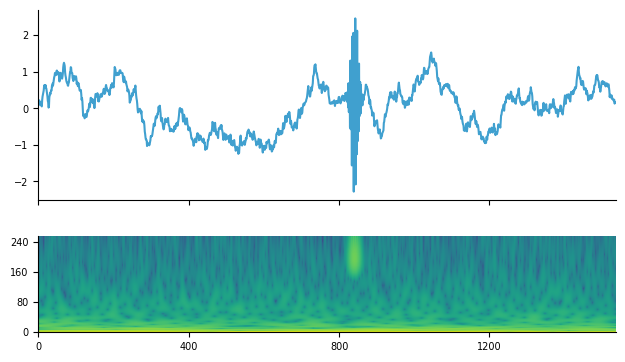

In [14]:
# Wavelet
x = xs["ripple"]
ww, ff = mngs.dsp.wavelet(xs["ripple"], fs, cuda=True)

# Plots
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
axes[0].plot(x[0, 0])
axes[1].imshow(ww[0, 0])
axes[1].invert_yaxis()
axes[1] = mngs.plt.ax.set_n_ticks(axes[1], n_xticks=4, n_yticks=4)
plt.tight_layout()
plt.show()

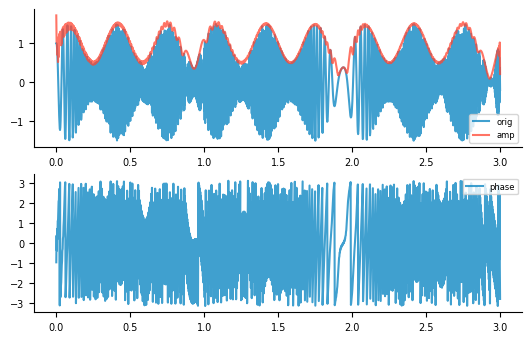

In [15]:
# Hilbert
x = xs["chirp"]
y = mngs.dsp.hilbert(x, cuda=True)
pha, amp = y[..., 0], y[..., 1]

fig, axes = mngs.plt.subplots(nrows=2)
axes[0].plot(tt, x[0, 0], label="orig")
axes[0].plot(tt, amp[0, 0], label="amp")
axes[1].plot(tt, pha[0, 0], label="phase")
axes[0].legend()
axes[1].legend()
plt.show()